# Atividade 4

## Código da Aula do Titanic para Auxiliar

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
data = pd.read_csv("train.csv")
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
X = data.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtypes}")


 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


In [6]:
indesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin'] # não são úteis ou possuem muita variação de dados
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [7]:
Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
for column in Xnum.columns:
  print(f"{column:>12} {sum(Xnum[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [10]:
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [11]:
for column in Xcat.columns:
  print(f"{column:>12} {sum(Xcat[column].isnull())}")

         Sex 0
    Embarked 2


In [12]:
imputer = SimpleImputer(strategy="most_frequent")
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [14]:
XcatHot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [15]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape


(891, 10)

In [16]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas_ = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X) # aqui chamamos o método fit_transform sem ele ter sido implementado anteriormente. Isso é possível devido ao TransformerMixin já ter esse método por padrão, havendo um fit e um transform implementados no código o TransformerMixin chamará um depois o outro
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [20]:
class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [22]:
class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [23]:
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_numericos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [24]:
from sklearn.pipeline import FeatureUnion

uneAtributos = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

Xtratado = uneAtributos.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
from sklearn.pipeline import Pipeline

preProcessamento = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('une_atributos', uneAtributos)
    ])

Xtratado = preProcessamento.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [27]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.0262208 , 0.02614856, 0.02412081, 0.02324843, 0.02459979]),
  'score_time': array([0.01120067, 0.01013064, 0.00997734, 0.01129723, 0.00978708]),
  'test_score': array([0.73184358, 0.79213483, 0.80337079, 0.74157303, 0.80898876])},
 0.7755821982298663)

In [28]:
pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('tree_submission.csv', index=False)

In [29]:
# o resultado do teste foi ruim (0,73) então vamos tentar ajustar hiperparametros para melhorar a pontuação

from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None] + list(range(1, 10, 2)),
    'preProcessamento__une_atributos__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
    }

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([2.7950325 , 2.18398285, 2.20039821, 2.16855025, 2.16321921]),
  'score_time': array([0.00640106, 0.00663614, 0.00628924, 0.00607038, 0.00678205]),
  'test_score': array([0.81564246, 0.82022472, 0.81460674, 0.78089888, 0.85393258])},
 0.8170610758897746)

In [30]:
modelo.fit(X, y)
modelo.best_estimator_

Pipeline(steps=[('preProcessamento',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('une_atributos',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=5))])

In [31]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('tree_gscv_submission.csv', index=False)

## Ensembles

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('floresta', RandomForestClassifier(class_weight='balanced', random_state=42))
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.4786427 , 0.29883432, 0.30016851, 0.30687356, 0.31140351]),
  'score_time': array([0.01569557, 0.01588869, 0.01967621, 0.02482271, 0.01855803]),
  'test_score': array([0.7877095 , 0.80898876, 0.84269663, 0.78651685, 0.82022472])},
 0.8092272926997678)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('floresta', ExtraTreesClassifier(random_state=42))
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([1.08963323, 1.00034595, 0.5630002 , 0.41290164, 0.34464455]),
  'score_time': array([0.06212616, 0.0669229 , 0.0241375 , 0.02337217, 0.01654506]),
  'test_score': array([0.77653631, 0.7752809 , 0.83707865, 0.78089888, 0.80337079])},
 0.7946331052664617)

In [36]:
from sklearn.ensemble import AdaBoostClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('ada', AdaBoostClassifier(DecisionTreeClassifier(max_depth=25, splitter='random', random_state=42),
                               random_state=42,
                               learning_rate=0.15))
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.27884197, 0.25894094, 0.28550696, 0.26584053, 0.28747725]),
  'score_time': array([0.02494836, 0.02469707, 0.0310359 , 0.02502584, 0.02812743]),
  'test_score': array([0.77653631, 0.76404494, 0.8258427 , 0.7752809 , 0.8258427 ])},
 0.7935095097608437)

In [50]:
from sklearn.ensemble import BaggingClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('bag', BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                              n_estimators=38,
                              random_state=42))
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.17925358, 0.16803336, 0.17266941, 0.17144799, 0.18414426]),
  'score_time': array([0.02336478, 0.02622104, 0.02322173, 0.02605748, 0.02373481]),
  'test_score': array([0.7877095 , 0.78089888, 0.87078652, 0.78651685, 0.83707865])},
 0.8125980792166217)

In [91]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('bag', BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                              n_estimators=38,
                              random_state=20)),
])

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('voting', voting)
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.29958367, 0.27194548, 0.22427011, 0.16927624, 0.17410898]),
  'score_time': array([0.09333611, 0.34721947, 0.04707289, 0.04609537, 0.05287743]),
  'test_score': array([0.77653631, 0.79775281, 0.85393258, 0.82022472, 0.84831461])},
 0.8193522063900571)

In [76]:
from sklearn.ensemble import StackingClassifier

voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('bag', BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                              n_estimators=38,
                              random_state=42))
])

stacking = StackingClassifier([
    ('voting', voting),
    ('extratree', ExtraTreesClassifier()),
    ('ranfor', RandomForestClassifier()),
], passthrough=True)

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('stacking', stacking)
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([4.29131985, 5.75986075, 4.20251346, 4.21506095, 8.49823642]),
  'score_time': array([0.07062078, 0.06631136, 0.06975508, 0.08927894, 0.06754661]),
  'test_score': array([0.81564246, 0.80898876, 0.83146067, 0.81460674, 0.83707865])},
 0.8215554579122466)

In [82]:
# gerando submission com as combinações de melhor desempenho

voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('bag', BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                              n_estimators=38,
                              random_state=42)),
])

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('voting', voting)
])

pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('voting_submission.csv', index=False)

In [81]:
voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('bag', BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                              n_estimators=38,
                              random_state=42))
])

stacking = StackingClassifier([
    ('voting', voting),
    ('extratree', ExtraTreesClassifier()),
    ('ranfor', RandomForestClassifier()),
], passthrough=True)

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('stacking', stacking)
])

pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('stacking_submission.csv', index=False)

## Resultado

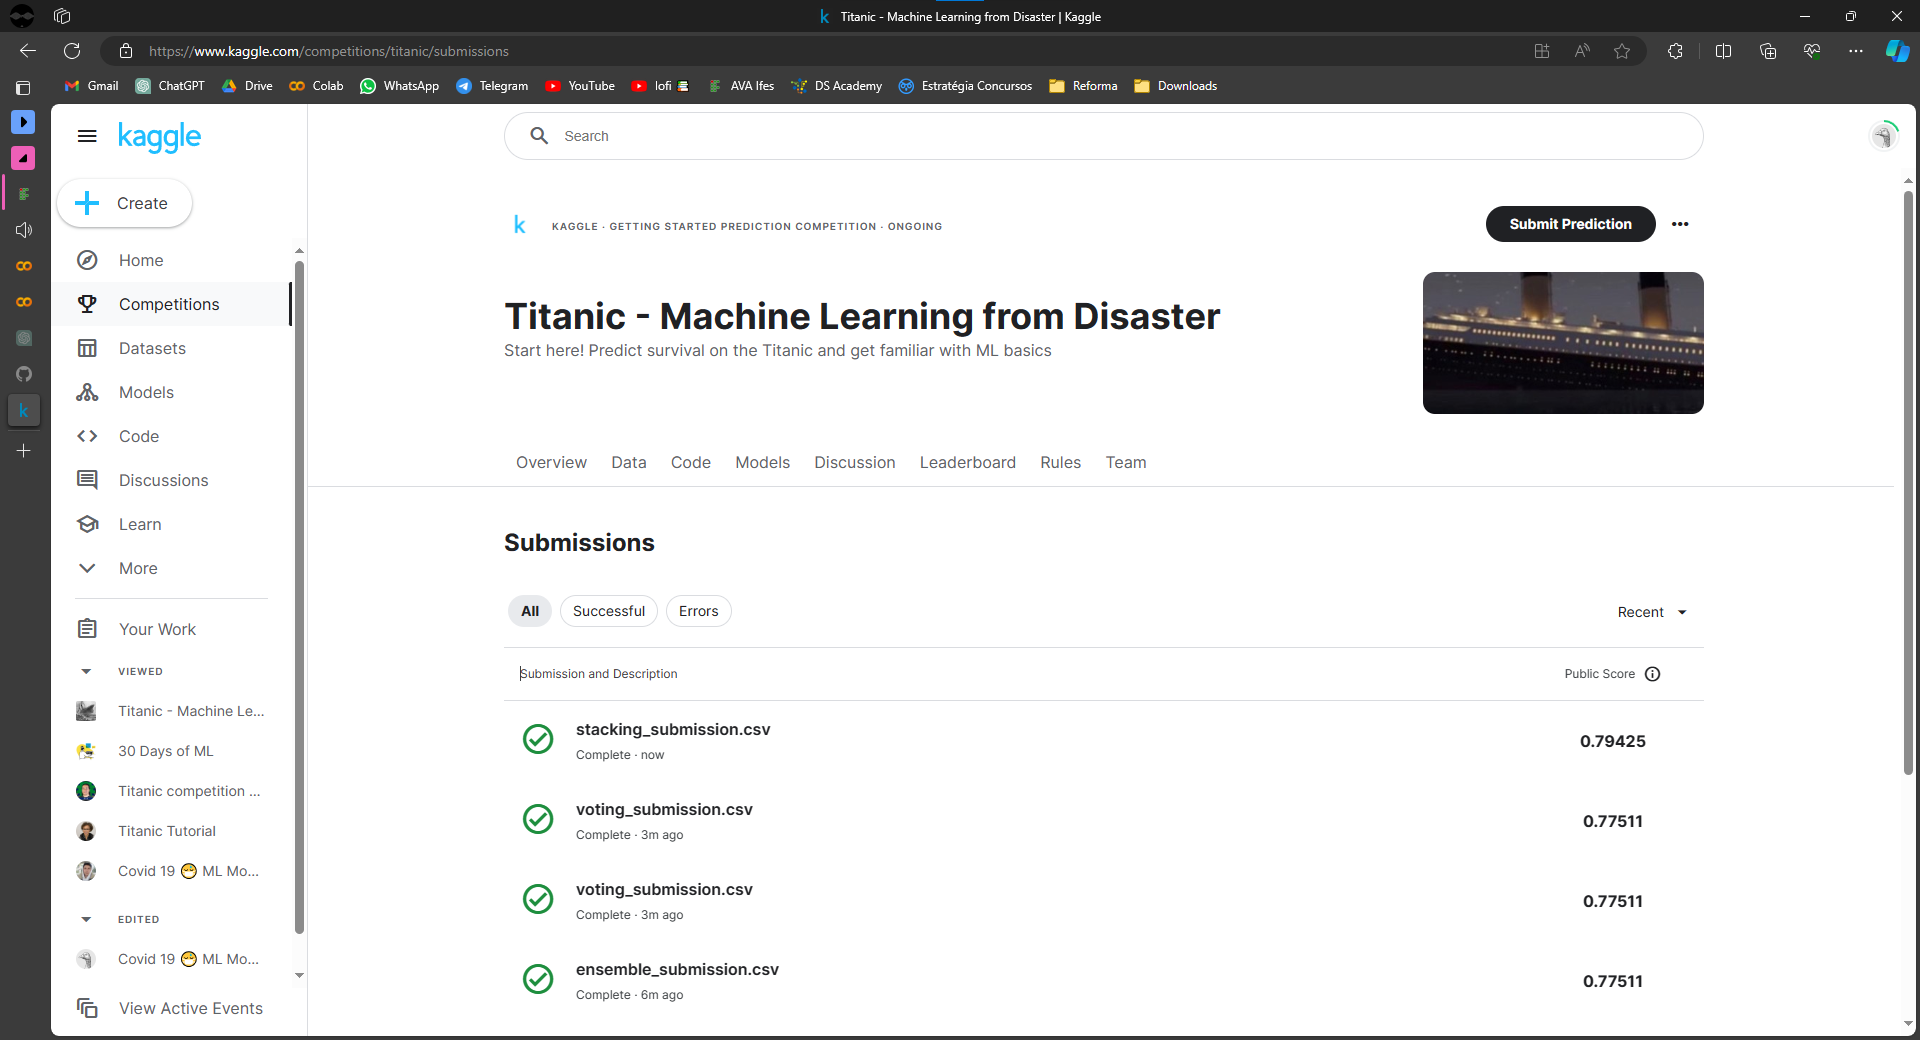